In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import pandas as pd
from planet_cookbook import read_reports as rr
import os
import rebound
import seaborn as sns

sol_to_earth = 332946.078
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [2]:
tajer_sims_list = []

for i in range(1,11):
    sim = rebound.Simulationarchive(f"/Users/honeyeah/Codes/data/cham_bench/cham_bench_{i}/cham_simarchive_{i}")
    tajer_sims_list.append(sim)

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)


In [18]:
sim = sim[0]
m_0 = 0
for i in range(sim.N):
    m_0 += sim.particles[i].m

print(m_0)

1.0012478400000147


/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [23]:
tajer_list = []

for i in range(0,10):
    sim = tajer_sims_list[i]
    times = np.zeros(len(sim))
    energies = np.zeros(len(sim))
    mvx = np.zeros(len(sim))
    mvy = np.zeros(len(sim))
    mvz = np.zeros(len(sim))
    L_mag = np.zeros(len(sim))
    dE_E = np.zeros(len(sim))
    dL_L = np.zeros(len(sim))
    E_0 = sim[0].energy()
    L_0 = np.linalg.norm((sim[0].angular_momentum()))
    m = np.zeros(len(sim))

    for j in range(len(sim)):
        times[j] = sim[j].t
        energies[j] = sim[j].energy()
        mvx[j], mvy[j], mvz[j] = sim[j].angular_momentum()
        L_mag[j] = np.sqrt(mvx[j]**2 + mvy[j]**2 + mvz[j]**2)
        if j > 0:
            dL_L[j] = abs((L_mag[j] - L_0)/L_0)
            dE_E[j] = abs((energies[j] -  E_0)/E_0)

        for k in range(sim[j].N):
            m[j] += sim[j].particles[k].m
    
    tajer_df = pd.DataFrame(columns = ['time', 'dL/L', 'dE/E'])
    tajer_df['time'] = times
    tajer_df['dE/E'] = dE_E
    tajer_df['dL/L'] = dL_L
    tajer_df['dm'] = m
    tajer_list.append(tajer_df)

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a bi

In [22]:
m

array([1.00124784, 1.00124784, 1.00124784, ..., 1.0012477 , 1.0012477 ,
       1.0012477 ], shape=(3001,))

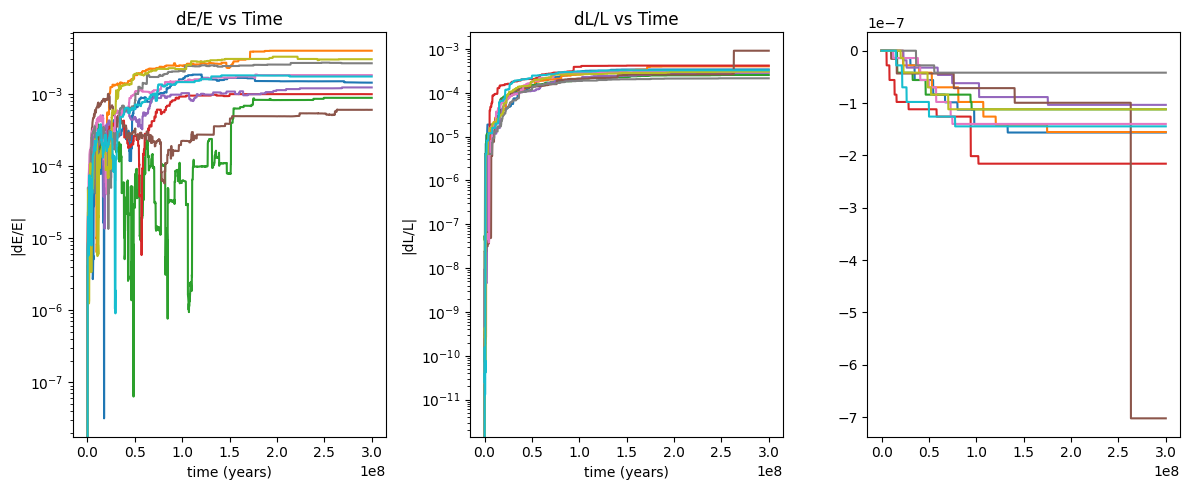

In [31]:
plt.figure(figsize=(12, 5))

# Plot dE/E
plt.subplot(1, 3, 1)
for i in range(len(tajer_list)):
    plt.plot(tajer_list[i]['time'], tajer_list[i]['dE/E'])
plt.xlabel('time (years)')
plt.ticklabel_format(axis='y', style='sci', scilimits=[0,0])
plt.ylabel('|dE/E|')
plt.yscale('log')
plt.title('dE/E vs Time')

# Plot dL/L
plt.subplot(1, 3, 2)
for i in range(len(tajer_list)):
    plt.plot(tajer_list[i]['time'], tajer_list[i]['dL/L'])
plt.xlabel('time (years)')
plt.ylabel('|dL/L|')
plt.title('dL/L vs Time')
plt.yscale('log')
#plt.ticklabel_format(axis='y', style='sci', scilimits=[0,0])

plt.subplot(1,3,3)
for i in range(len(tajer_list)):
    plt.plot(tajer_list[i]['time'], (tajer_list[i]['dm'] - m_0)/m_0)

plt.tight_layout()
plt.show()


In [28]:
tajer = pd.concat(tajer_list)

In [29]:
tajer

,time,dL/L,dE/E,dm
0,0.000000e+00,0.000000e+00,0.000000,1.001248
1,1.000000e+05,2.757779e-10,0.000001,1.001248
2,2.000000e+05,2.931005e-10,0.000002,1.001248
3,3.000000e+05,2.904683e-10,0.000006,1.001248
4,4.000000e+05,3.097150e-10,0.000007,1.001248
...,...,...,...,...
2996,2.996000e+08,3.253580e-04,0.001741,1.001248
2997,2.997000e+08,3.253580e-04,0.001741,1.001248
2998,2.998000e+08,3.253580e-04,0.001741,1.001248
2999,2.999000e+08,3.253580e-04,0.001741,1.001248


In [11]:
np.average(tajer['dE/E'])

np.float64(0.0014044818173828953)

In [12]:
np.average(tajer['dL/L'])

np.float64(0.00025669588377676323)

In [1]:
from astropy import units as u

In [6]:
m = 10**25 * u.g
m = m.to(u.M_earth)
m

<Quantity 0.00167443 earthMass>